In [1]:
%matplotlib inline

from ngramkit.common.w2v_model import W2VModel
from ngramkit.ngram_analyze.cosine_similarity_time_series import cosine_similarity_over_years
from ngramkit.ngram_analyze.weat_time_series import compute_weat_over_years
from ngramkit.ngram_analyze.semantic_drift import track_yearly_drift, compute_similarity_to_previous_year
from ngramkit.ngram_analyze.average_relatedness_by_year import track_word_semantic_drift

# **Analyze Semantic Change**
## **Goal**: Use trained `Word2vec` emeddings to examine semantic change over time. 

The `hist_w2v` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [2]:
model_path =  '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [35]:
year = 2019
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs200_w004_mc001_sg1_e010.kv')

word1, word2 = 'horse', 'mule'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'whale'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'tree'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'neutron'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'mule' in 2019 = 0.8204
cos(Φ) of 'horse' and 'whale' in 2019 = 0.4109
cos(Φ) of 'horse' and 'tree' in 2019 = 0.2708
cos(Φ) of 'horse' and 'neutron' in 2019 = 0.1193


The results are about what would would expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [36]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs200_w004_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y2018_wbnone_vs200_w004_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.9340
  cos(Φ) SD = 0.0246
  shared words: 6000

Similarity of 'horse' between models:
  cos(Φ) = 0.9517



### `track_yearly_drift` function

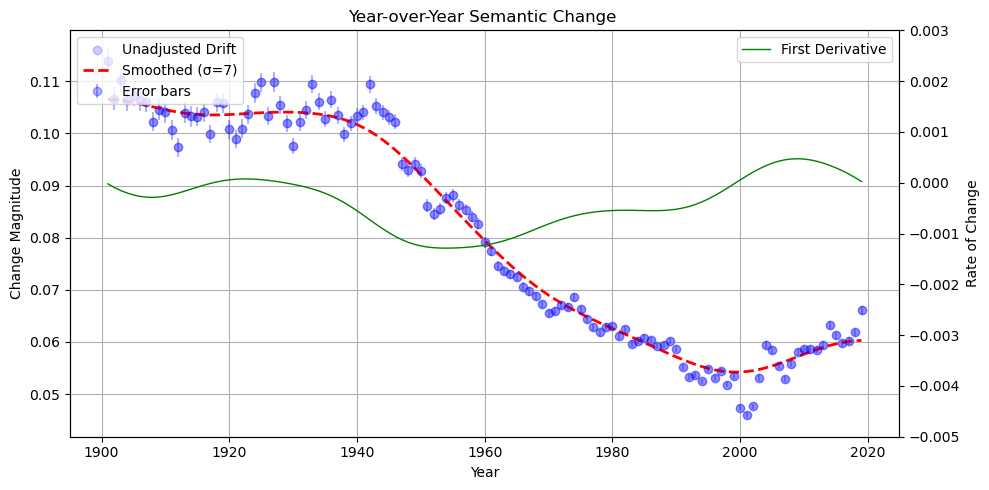

In [39]:
drift_scores = track_yearly_drift(
    start_year=1900,
    end_year=2019,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=7,
    confidence=0.99
)

### `mean_cosine_similarity_to_all` class

In [40]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs200_w004_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')
print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1798


Tracking semantic drift for word: 'gay' (Excluding: 0 words)


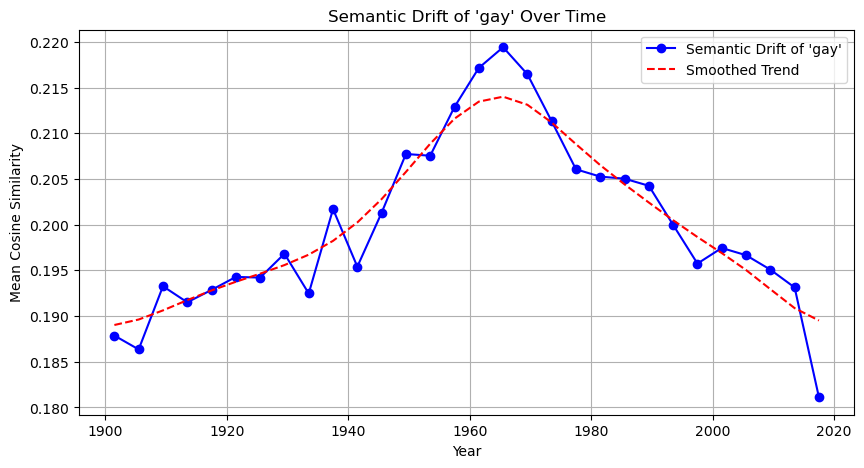

{1900: (0.18650910647475744, 0),
 1901: (0.18348938523309252, 0),
 1902: (0.1907357798854867, 0),
 1903: (0.19073863273820757, 0),
 1904: (0.1832360673497721, 0),
 1905: (0.18591942666772712, 0),
 1906: (0.18869962118756808, 0),
 1907: (0.18755179694156104, 0),
 1908: (0.1956936430899599, 0),
 1909: (0.19371939749110997, 0),
 1910: (0.19164702199444325, 0),
 1911: (0.19199395408460543, 0),
 1912: (0.19612605531120267, 0),
 1913: (0.18955522802515762, 0),
 1914: (0.1912941497034095, 0),
 1915: (0.18905308626369055, 0),
 1916: (0.19010434845714777, 0),
 1917: (0.19353922842648189, 0),
 1918: (0.1907615277104757, 0),
 1919: (0.19704669199177258, 0),
 1920: (0.19375077050601913, 0),
 1921: (0.19662784059222924, 0),
 1922: (0.18919154358297674, 0),
 1923: (0.19756032212398753, 0),
 1924: (0.18659558773977836, 0),
 1925: (0.1953137077786424, 0),
 1926: (0.1989027162588472, 0),
 1927: (0.19604547612069165, 0),
 1928: (0.19555227169899492, 0),
 1929: (0.20135041770417691, 0),
 1930: (0.1957843

In [42]:
track_word_semantic_drift(
    word='gay',
    start_year=1900,
    end_year=2019,
    model_dir=f'{model_path}',
    plot=4,
    smooth=True,
    sigma=2
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

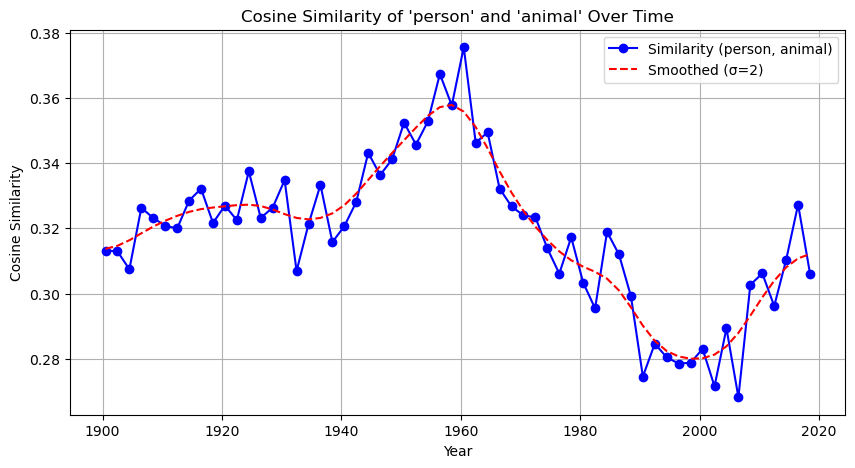

{1900: 0.31625003,
 1901: 0.31017324,
 1902: 0.31605726,
 1903: 0.30984163,
 1904: 0.29386696,
 1905: 0.3210512,
 1906: 0.33227792,
 1907: 0.32032815,
 1908: 0.315146,
 1909: 0.33118823,
 1910: 0.32428128,
 1911: 0.3173041,
 1912: 0.3213774,
 1913: 0.31856528,
 1914: 0.33720684,
 1915: 0.31980085,
 1916: 0.33220324,
 1917: 0.33209467,
 1918: 0.32960454,
 1919: 0.31370375,
 1920: 0.33151487,
 1921: 0.3224075,
 1922: 0.3262821,
 1923: 0.31877834,
 1924: 0.32711312,
 1925: 0.3478149,
 1926: 0.31413078,
 1927: 0.33225378,
 1928: 0.33115172,
 1929: 0.32156673,
 1930: 0.34021217,
 1931: 0.32936504,
 1932: 0.29017183,
 1933: 0.32367378,
 1934: 0.31577906,
 1935: 0.32675204,
 1936: 0.32018885,
 1937: 0.34649834,
 1938: 0.31584755,
 1939: 0.31574425,
 1940: 0.31957492,
 1941: 0.32175663,
 1942: 0.3410978,
 1943: 0.31510258,
 1944: 0.345648,
 1945: 0.34065816,
 1946: 0.33599257,
 1947: 0.33667812,
 1948: 0.32206452,
 1949: 0.36023796,
 1950: 0.35121045,
 1951: 0.35354748,
 1952: 0.34427214,
 195

In [99]:
cosine_similarity_over_years(
    word1='person',
    word2='animal',
    start_year=1900,
    end_year=2019,
    model_dir=f'{model_path}',
    plot=2,
    smooth=True,
    sigma=2
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [70]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs200_w004_mc001_sg1_e010.kv')

target1 = ["poor", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "miserable"]

weat_score, p = model.compute_weat(target1, target2, attribute1, attribute2)
print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = -1.0382, p = 0.8279


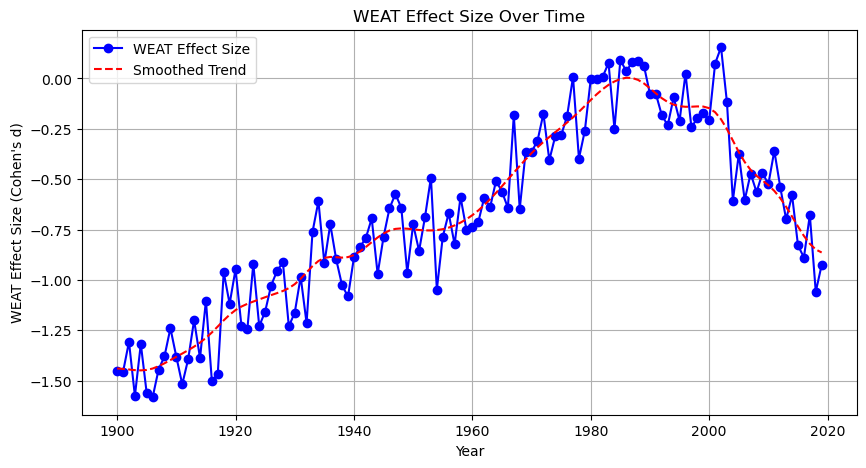

{1900: (-1.4544581, None, None),
 1901: (-1.4566743, None, None),
 1902: (-1.3071189, None, None),
 1903: (-1.575558, None, None),
 1904: (-1.3177866, None, None),
 1905: (-1.5635152, None, None),
 1906: (-1.5821735, None, None),
 1907: (-1.4449908, None, None),
 1908: (-1.3789423, None, None),
 1909: (-1.23963, None, None),
 1910: (-1.381544, None, None),
 1911: (-1.5180678, None, None),
 1912: (-1.3932841, None, None),
 1913: (-1.1997266, None, None),
 1914: (-1.3879671, None, None),
 1915: (-1.1027409, None, None),
 1916: (-1.5018644, None, None),
 1917: (-1.4659848, None, None),
 1918: (-0.96196693, None, None),
 1919: (-1.1183212, None, None),
 1920: (-0.94726133, None, None),
 1921: (-1.2290511, None, None),
 1922: (-1.242607, None, None),
 1923: (-0.91980326, None, None),
 1924: (-1.2295562, None, None),
 1925: (-1.1569775, None, None),
 1926: (-1.028839, None, None),
 1927: (-0.9557979, None, None),
 1928: (-0.9126608, None, None),
 1929: (-1.2300739, None, None),
 1930: (-1.16

In [86]:
target1 = ["poor", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy", "content", "peaceful"]
attribute2 = ["unhappy", "sad", "lonely", "miserable"]

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=3,
    return_std=False
)

In [ ]:
target1 = ["human", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy", "content", "peaceful"]
attribute2 = ["unhappy", "sad", "lonely", "miserable"]

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=3,
    return_std=False
)